In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import my_library.constants as constants

## Change font for plot. 

> i think its fontfamily or something
> chatgpt will know

In [2]:
path_to_nominal = '/work/halld/home/viducic/data/fit_params/{}/tf1_gaus_cross_section_values.csv'
path_to_bootstrapped = '/work/halld/home/viducic/data/fit_params/{}/bootstrap_amplitudes.csv'

df_nominal_pipkmks = pd.read_csv(path_to_nominal.format('pipkmks'))
df_nominal_pimkpks = pd.read_csv(path_to_nominal.format('pimkpks'))
df_bootstrapped_pipkmks = pd.read_csv(path_to_bootstrapped.format('pipkmks'))
df_bootrapped_pimkpks = pd.read_csv(path_to_bootstrapped.format('pimkpks'))

bs_grouped_pipkmks = df_bootstrapped_pipkmks.groupby(['e_bin', 't_bin'])
bs_grouped_pimkpks = df_bootrapped_pimkpks.groupby(['e_bin', 't_bin'])

df_nominal_pipkmks['rel_err'] = np.where(True, df_nominal_pipkmks['yield_error']/df_nominal_pipkmks['yield'], 0)
df_nominal_pimkpks['rel_err'] = np.where(True, df_nominal_pimkpks['yield_error']/df_nominal_pimkpks['yield'], 0)


In [3]:
# print(df_bootstrapped_pipkmks[df_bootstrapped_pipkmks['t_bin'] == 7].to_markdown())

In [4]:
dict_pipkmks = {'e':[], 't':[], 'nom_rel_err':[], 'bs_rel_err':[]}
for (e, t), group in bs_grouped_pipkmks:
    mean = group['amplitude'].mean()
    # std = group['amplitude'].std()
    var = np.where(group['amplitude'] >=0, (group['amplitude'] - mean)*(group['amplitude'] - mean), 0).sum()/(len(group)-1)
    std = np.sqrt(var)
    bs_rel_err = (std / mean)

    t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
    nom_rel_err = df_nominal_pipkmks[(df_nominal_pipkmks['beam_energy'] == e) & (df_nominal_pipkmks['t_bin_middle'] == t_middle)]['rel_err'].values[0]

    dict_pipkmks['e'].append(e)
    dict_pipkmks['t'].append(t)
    dict_pipkmks['nom_rel_err'].append(nom_rel_err)
    dict_pipkmks['bs_rel_err'].append(bs_rel_err)

    # print(f'pipkmks: e={e}, t={t}, nom_rel_err={nom_rel_err}, bs_rel_err={bs_rel_err}, REL_DIFF = {bs_rel_err/nom_rel_err}')

In [5]:
dict_pimkpks = {'e':[], 't':[], 'nom_rel_err':[], 'bs_rel_err':[]}
for (e, t), group in bs_grouped_pimkpks:
    mean = group['amplitude'].mean()
    # std = group['amplitude'].std()
    var = np.where(group['amplitude'] >=0, (group['amplitude'] - mean)*(group['amplitude'] - mean), 0).sum()/(len(group)-1)
    std = np.sqrt(var)
    bs_rel_err = (std / mean)

    t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
    nom_rel_err = df_nominal_pimkpks[(df_nominal_pimkpks['beam_energy'] == e) & (df_nominal_pimkpks['t_bin_middle'] == t_middle)]['rel_err'].values[0]

    dict_pimkpks['e'].append(e)
    dict_pimkpks['t'].append(t)
    dict_pimkpks['nom_rel_err'].append(nom_rel_err)
    dict_pimkpks['bs_rel_err'].append(bs_rel_err)

In [6]:
df_pipkmks = pd.DataFrame(dict_pipkmks)
df_pimkpks = pd.DataFrame(dict_pimkpks)

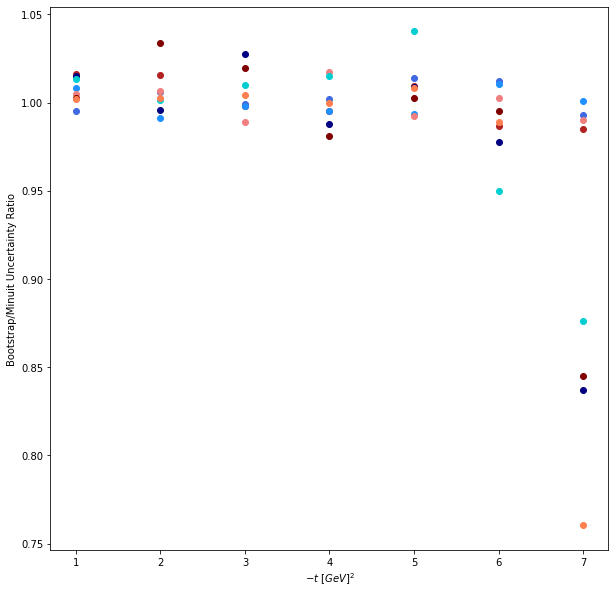

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')

energy_colors = {
    8: ('royalblue', 'firebrick'),
    9: ('dodgerblue', 'lightcoral'),
    10: ('navy', 'maroon'),
    11: ('darkturquoise', 'coral')
}

e_grouped_pipkmks = df_pipkmks.groupby('e')
e_grouped_pimkpks = df_pimkpks.groupby('e')

for (epip, grouppip), (epim, grouppim) in zip(e_grouped_pipkmks, e_grouped_pimkpks): 
    ax.scatter(grouppip['t'], grouppip['bs_rel_err']/grouppip['nom_rel_err'], c=energy_colors[epip][0])
    ax.scatter(grouppim['t'], grouppim['bs_rel_err']/grouppim['nom_rel_err'], c=energy_colors[epim][1])
    ax.set_title('')
    ax.set_xlabel('$-t ~[GeV]^2$')
    ax.set_ylabel('Bootstrap/Minuit Uncertainty Ratio')

plt.show()

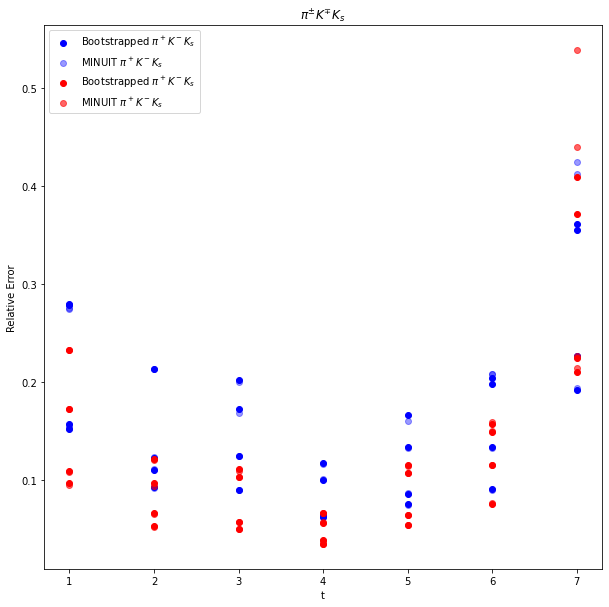

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')


ax.scatter(df_pipkmks['t'], df_pipkmks['bs_rel_err'], c='blue', label='Bootstrapped $\pi^+K^-K_s$')
ax.scatter(df_pipkmks['t'], df_pipkmks['nom_rel_err'], c='blue', alpha=0.4, label='MINUIT $\pi^+K^-K_s$')
ax.scatter(df_pimkpks['t'], df_pimkpks['bs_rel_err'], c='red', label='Bootstrapped $\pi^+K^-K_s$')
ax.scatter(df_pimkpks['t'], df_pimkpks['nom_rel_err'], c='red', alpha=0.6, label='MINUIT $\pi^+K^-K_s$')

ax.set_title('$\pi^{\pm}K^{\mp}K_s$')
ax.set_xlabel('t')
ax.set_ylabel('Relative Error')
ax.legend()

plt.show()

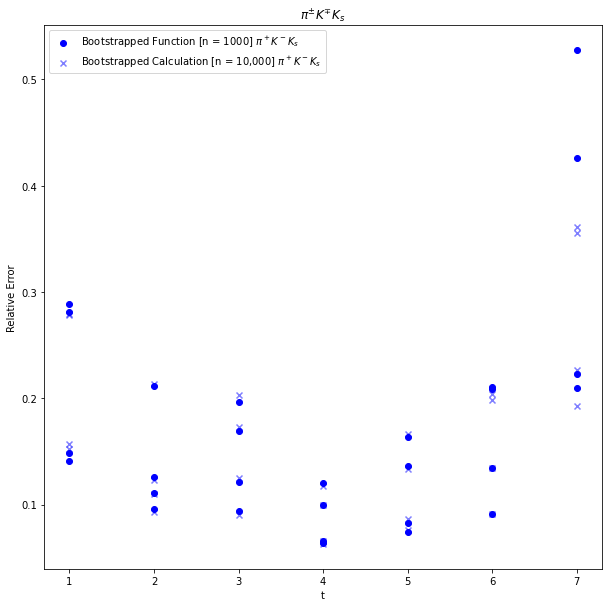

In [9]:
df_err_func = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/bootstrap_err_nominal.csv')

fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')
ax.scatter(df_err_func['t_bin'], df_err_func['bootstrap_err'], c='blue', marker='o', label='Bootstrapped Function [n = 1000] $\pi^+K^-K_s$')
ax.scatter(df_pipkmks['t'], df_pipkmks['bs_rel_err'], c='blue', alpha=0.5, marker="x", label='Bootstrapped Calculation [n = 10,000] $\pi^+K^-K_s$')
ax.set_title('$\pi^{\pm}K^{\mp}K_s$')
ax.set_xlabel('t')
ax.set_ylabel('Relative Error')
ax.legend()

plt.show()

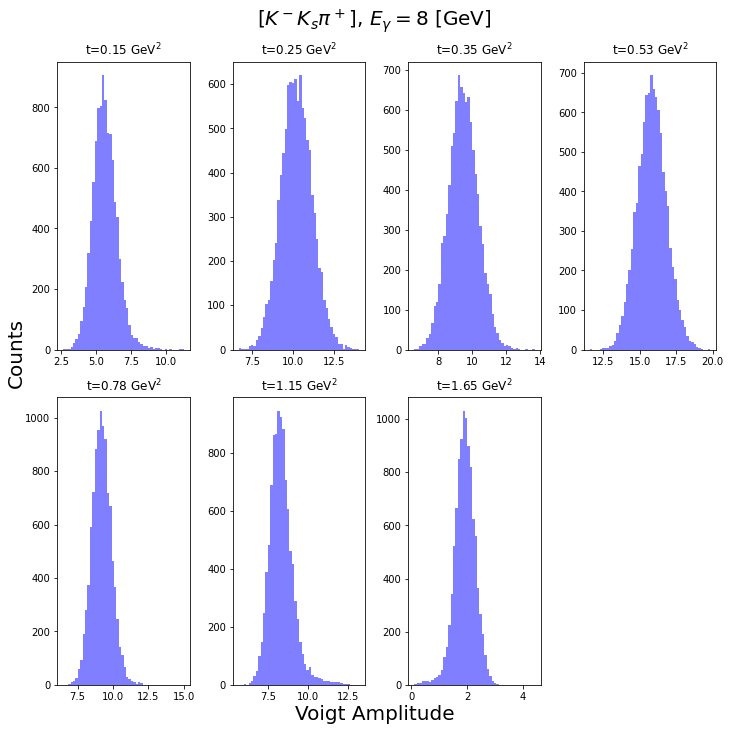

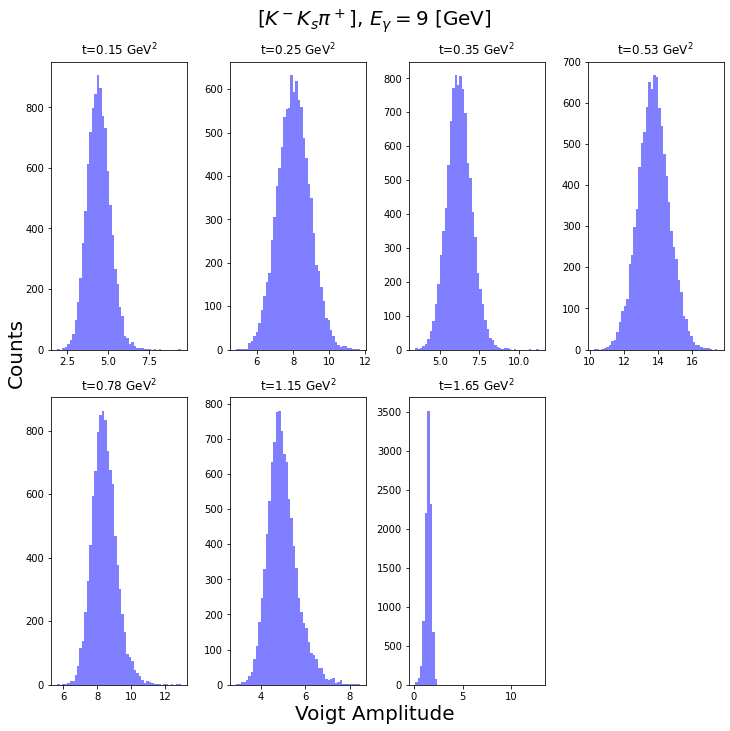

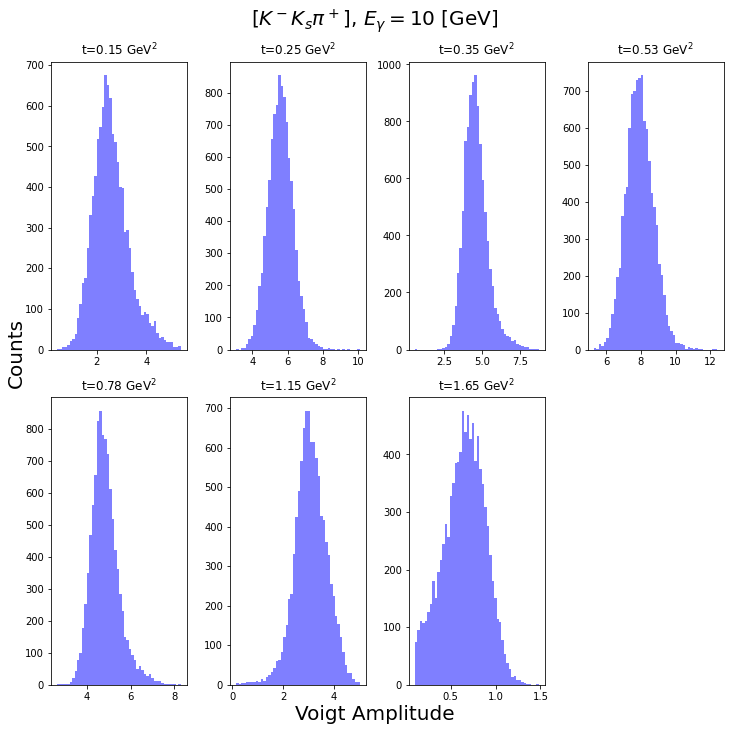

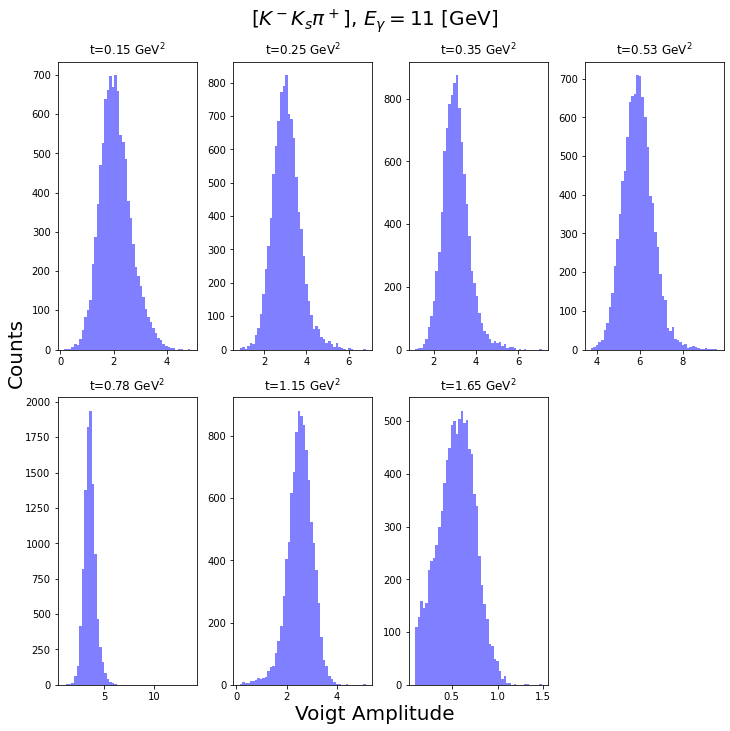

In [10]:
for e in range(8, 12):
    fig, axs = plt.subplots(2,4,figsize=(10, 10))
    axs[1,3].axis('off')
    fig.suptitle(f'$[K^-K_s\pi^+]$, $E_\gamma = {e}$ [GeV]', fontsize=20)
    fig.text(0.5, -0.01, 'Voigt Amplitude', fontsize=20, ha='center')
    fig.text(-0.01, 0.5, 'Counts', va='center', fontsize=20, rotation='vertical')
    fig.set_tight_layout(True)
    fig.set_facecolor('white')
    for t in range(1, 8):
        t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
        row = (t-1) // 4
        col = (t-1) % 4
        ax = axs[row, col]
        ax.set_title(f't={t_middle:0.2f} GeV$^2$')
        # ax.set_xlabel('Fit Amplitude')
        # ax.set_ylabel('Frequency')
        ax.hist(bs_grouped_pipkmks.get_group((e, t))['amplitude'], bins=50, color='b', alpha=0.5, label='Bootstrap')
    fig.savefig(f'/work/halld/home/viducic/scripts/crosssection/plots/bootstrapped_fits/pipkmks_e{e}.png', facecolor=fig.get_facecolor(), transparent=False)
plt.show()

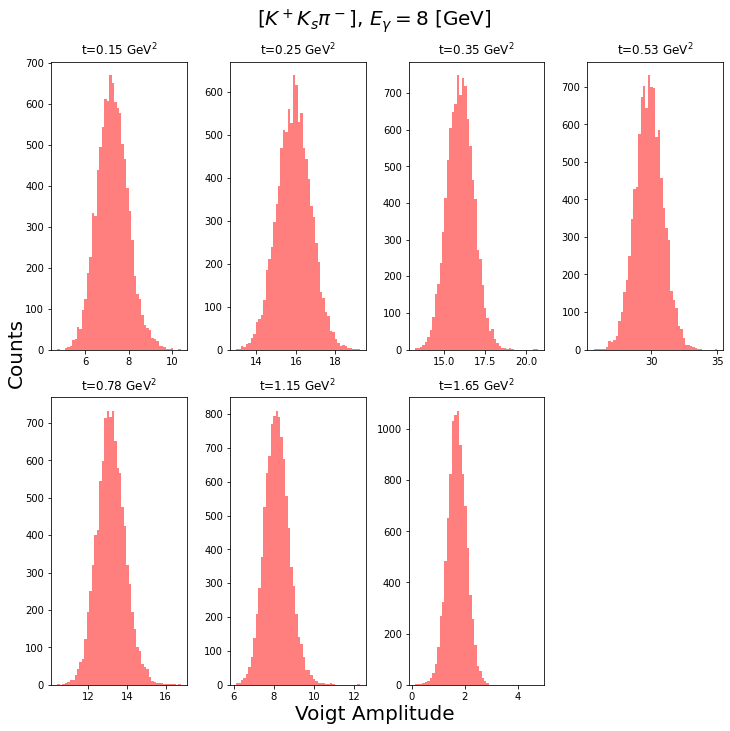

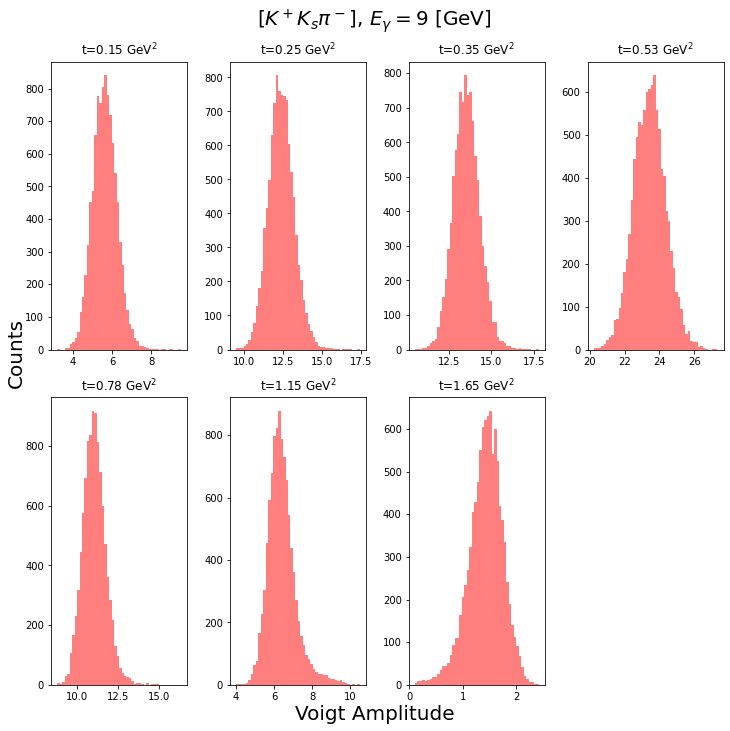

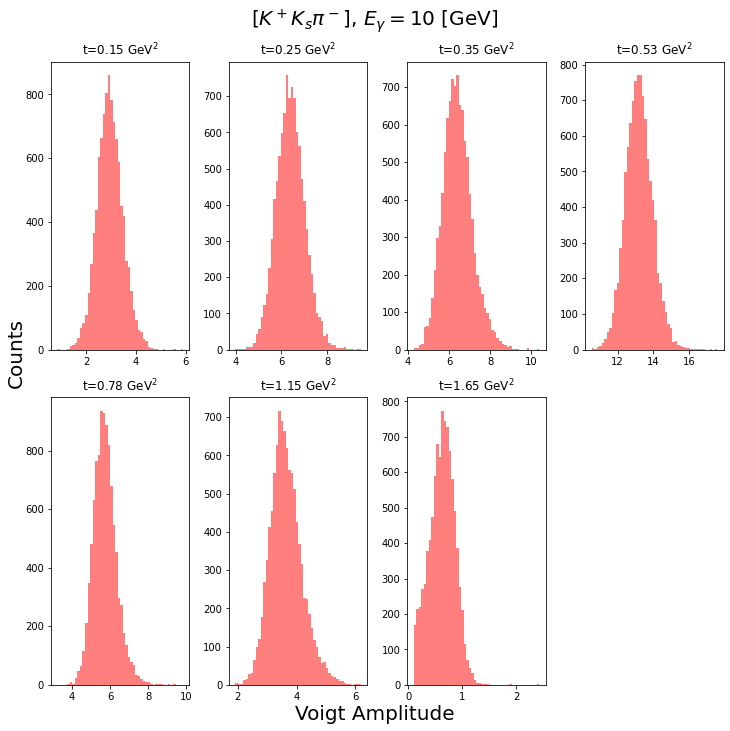

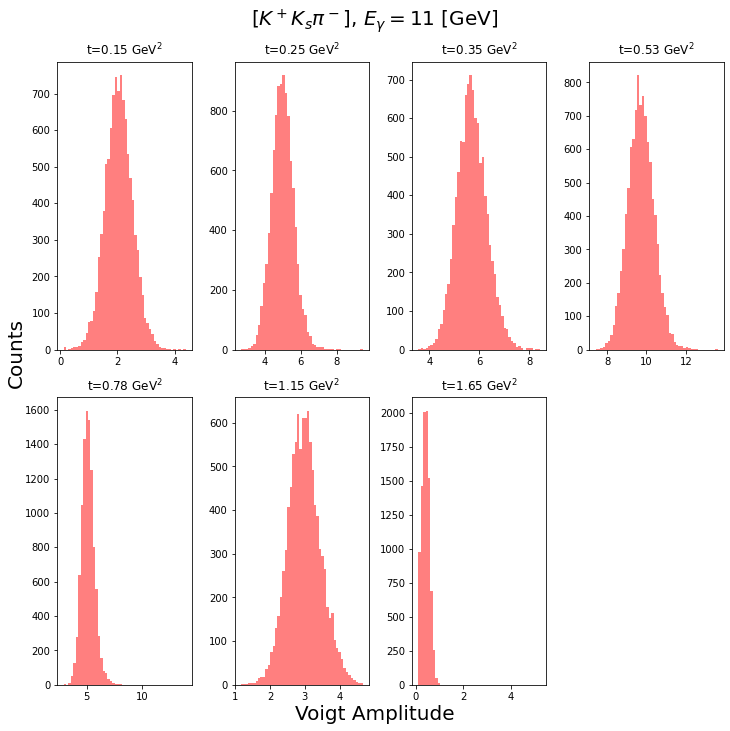

In [11]:
for e in range(8, 12):
    fig, axs = plt.subplots(2,4,figsize=(10, 10))
    axs[1,3].axis('off')
    fig.suptitle(f'$[K^+K_s\pi^-]$, $E_\gamma = {e}$ [GeV]', fontsize=20)
    fig.text(0.5, -0.01, 'Voigt Amplitude', fontsize=20, ha='center')
    fig.text(-0.01, 0.5, 'Counts', va='center', fontsize=20, rotation='vertical')
    fig.set_tight_layout(True)
    fig.set_facecolor('white')
    for t in range(1, 8):
        t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
        row = (t-1) // 4
        col = (t-1) % 4
        ax = axs[row, col]
        ax.set_title(f't={t_middle:0.2f} GeV$^2$')
        # ax.set_xlabel('Fit Amplitude')
        # ax.set_ylabel('Frequency')
        ax.hist(bs_grouped_pimkpks.get_group((e, t))['amplitude'], bins=50, color='r', alpha=0.5, label='Bootstrap')
    fig.savefig(f'/work/halld/home/viducic/scripts/crosssection/plots/bootstrapped_fits/pimkpks_e{e}.png', facecolor=fig.get_facecolor(), transparent=False)
plt.show()